In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [54]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

(array([171., 315., 672., 795., 765., 651., 393., 276., 231., 141.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

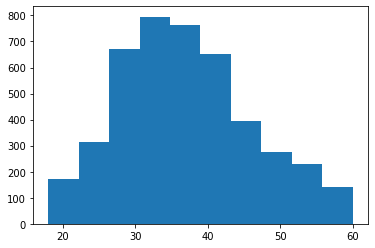

In [55]:
plt.hist(df['Age'])

### 1) Hypothesis 
* Mean age of employ is less than 36
* H0 <= 36
* H1 > 36

In [56]:
samples = []
for i in range (10):
    sample = df['Age'].sample(200)
    samples.append(sample.mean())
print('Avg sample of age is :- ',sum(samples) / 10 )   

Avg sample of age is :-  36.9415


In [57]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [58]:
lis = []
for i in range (100):
    sample = df.sample(200)
    val1 = sample[sample['BusinessTravel'] == 'Travel_Rarely']
    val2 = sample[sample['BusinessTravel'] == 'Travel_Frequently']
    lis.append(val1.shape[0] - val2.shape[0])
lis = np.array(lis)    
if lis.mean() > 0 :
    print('Reject Null Hypothesis')
else :
    print('Accept Null Hypothesis')

Reject Null Hypothesis


### 2) Hypothesis
* H0 : Number of employ who travel_frequently is more than employ who travel rarely
* H1 : Number of employ who travel_frequently is less than employ who travel rarely

In [59]:
df['DistanceFromHome']
lis1 = []
lis2 = []
for i in range (100):
    sample = df.sample(200)
    val1 = sample[sample['Attrition'] == 'Yes']
    val2 = sample[sample['Attrition'] == 'No']
    lis1.append(val1['DistanceFromHome'].mean())
    lis2.append(val2['DistanceFromHome'].mean())
    
lis1 = np.array(lis1)
lis2 = np.array(lis2)
print(lis1.mean())
print(lis2.mean())
    

9.149227871824266
9.23794491449892


### 3) Hypothesis
* H0 : mean distance from home for attrattion yes is less than mean distance from home for attrattion no
* H1 : mean distance from home for attrattion yes is more than mean distance from home for attrattion no

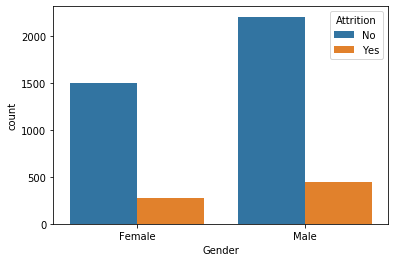

In [60]:
sns.countplot(df['Gender'] , hue = df['Attrition'])

### 4) Hypothesis
* H0 : Female employ have more attrition than male employ
* H1 : Male employ have more attrition than female employ

In [61]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

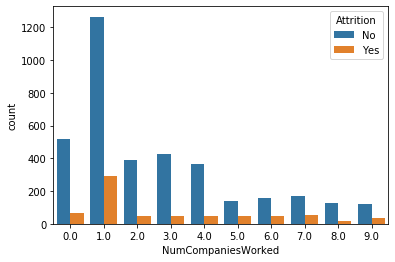

In [62]:
sns.countplot('NumCompaniesWorked' , hue = 'Attrition' , data = df)

### 5) Hypothesis
* H0 : Attriation rate is highest if number of companies in which employ worked == 1
* H1 : Attriation rate is highest if number of companies in which employ worked > 1   

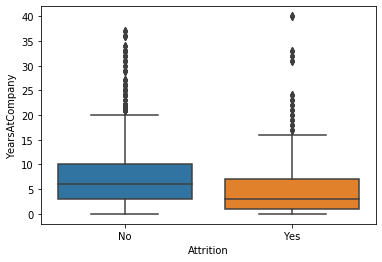

In [63]:
sns.boxplot( y = 'YearsAtCompany' , x = 'Attrition' , data = df)

### 6) Hypothesis
* H0 : median value of yearsatcomapny for attrition yes if greater than median value of yearsatcomapny for attrition no.
* H1 : median value of yearsatcomapny for attrition no if greater than median value of yearsatcomapny for attrition yes. 

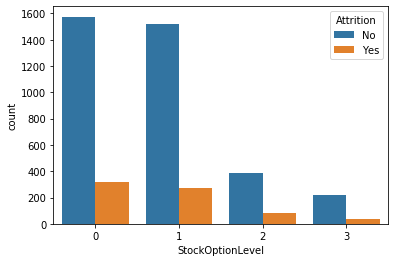

In [64]:
sns.countplot('StockOptionLevel' , hue = 'Attrition' , data = df)

### 7) Hypothesis
* H0 : Attrition for stackoption = 0 is highest
* H1 : Attrition for stackoption > 0 is highest

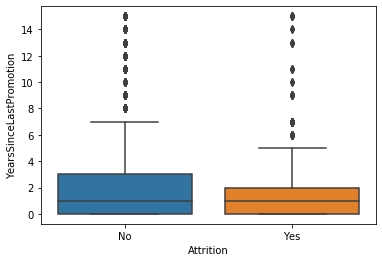

In [65]:
sns.boxplot( y = 'YearsSinceLastPromotion' , x = 'Attrition' , data = df)

### 8) Hypothesis
* H0 : median value of years since last promotion for attrition yes is equal to median value of years since last promotion for attrition no
* H1 :  median value of years since last promotion for attrition yes is not equal to median value of years since last promotion for attrition no

In [66]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

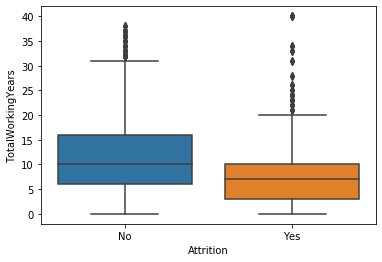

In [67]:
sns.boxplot( y = 'TotalWorkingYears' , x = 'Attrition' , data = df)

### 9) Hypothesis
* H0 : median value of total working years for attrition yes is greater than median value of total working years for attrition no
* H1 : median value of total working years for attrition no is greater than median value of total working years for attrition yes

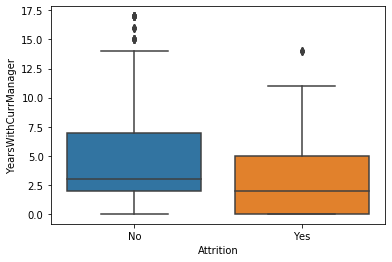

In [68]:
sns.boxplot( y = 'YearsWithCurrManager' , x = 'Attrition' , data = df)

### 10) Hypothesis
* H0 : median value of working years with manager for attrition yes is greater than median value of total working years with manager for attrition no
* H1 : median value of total working years with manager for attrition no is greater than median value of total working years with manager for attrition yes